## Part 2 GAN

#### Task 1
Please refer to my_gan.py for detailed GAN implementation. <br>
The implementation is based on DCGAN from paper with some dimension modification for MNIST Dataset:<br>
[Unsupervised Representation Learning With Deep Convolutional Generative Adversarial Networks](https://arxiv.org/pdf/1511.06434.pdf)

#### Task 2
The model is trained using the `train` method in my_gan.py for 200 epochs.<br>
##### 2.1 The sampled 25 images at different phase
There are in total 376 sets of 25 images sampled during the training set every
500 batches, numbered from 0 to 187500.

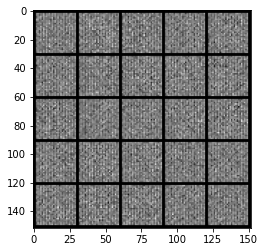

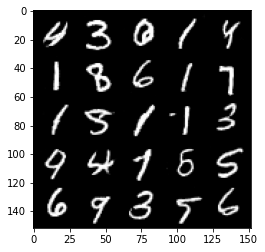

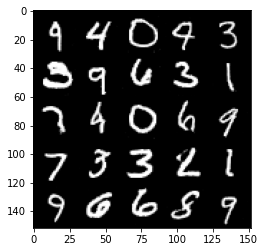

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
img1 = Image.open('images/0.png')
img2 = Image.open('images/93500.png')
img3 = Image.open('images/187500.png')
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()

#### Task 3
Using the pretrained GAN to show the interpolation result.
##### 3.1 Find 2 vectors in the latent space belonging to different classes

In [4]:
from my_gan import Generator
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
def show_fake(fake):
    fake = fake.squeeze(0)
    trans = transforms.ToPILImage()
    fake = trans(fake)
    plt.imshow(fake,cmap='gray')
    plt.show()
generator = Generator(latent_dim=100)
generator.load_state_dict(torch.load('mnist_generator.pt'))

<All keys matched successfully>

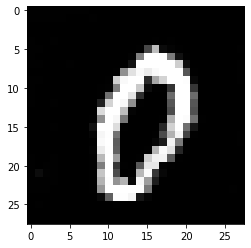

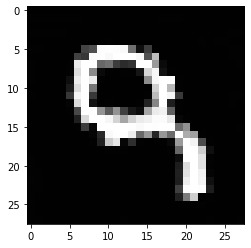

In [13]:
noise1 = torch.randn(1, 100, 1, 1)
noise2 = torch.randn(1, 100, 1, 1)
fake1 = generator(noise1)
fake2 = generator(noise2)
show_fake(fake1)
show_fake(fake2)

##### 3.2 Save these two vectors as '0.pt' and '9.pt'

In [14]:
torch.save(noise1,'0.pt')
torch.save(noise2,'9.pt')

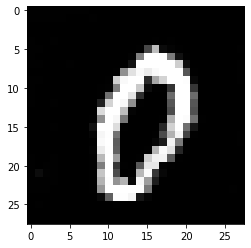

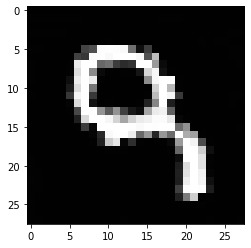

In [5]:
v0 = torch.load('0.pt')
v9 = torch.load('9.pt')
fake0 = generator(v0)
fake9 = generator(v9)
show_fake(fake0)
show_fake(fake9)

##### 3.3 Interpolation

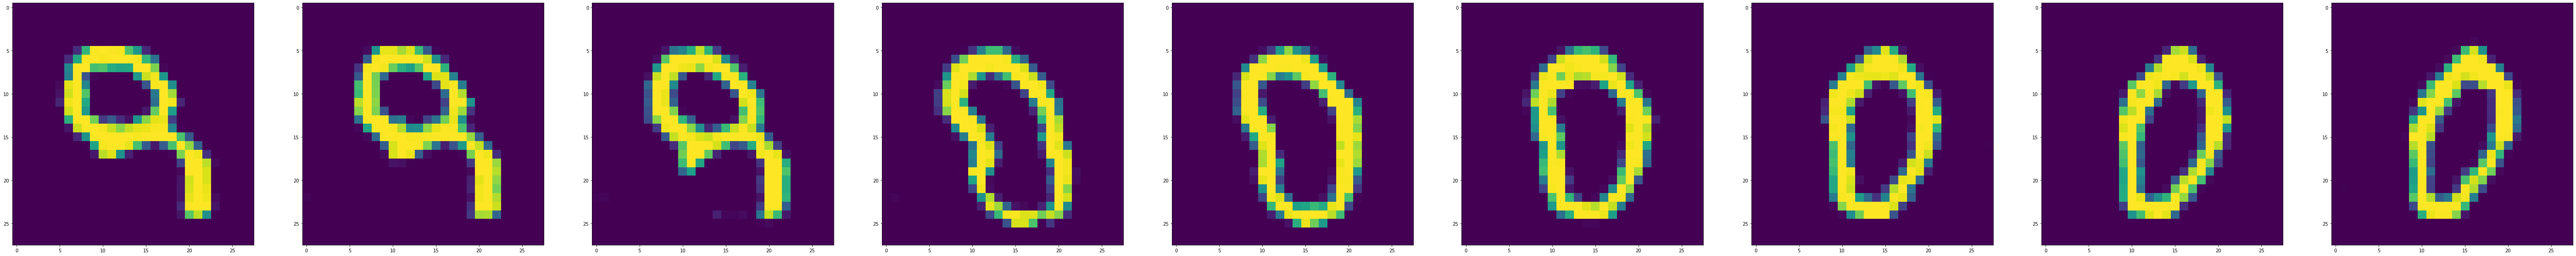

In [6]:
noise_lst = []
num = 9
for i in range(num):
    noise = (i * v0 + (num-i) * v9)/num
    noise_lst.append(noise)

fig,axis = plt.subplots(1,num,figsize=(100,15))

for i in range(num):
    img = generator(noise_lst[i]).squeeze()
    axis[i].imshow(img.detach().numpy())

plt.show()